<a href="https://colab.research.google.com/github/Altaieb-Mohammed/lab_2corse/blob/master/c_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy (all features): 0.82


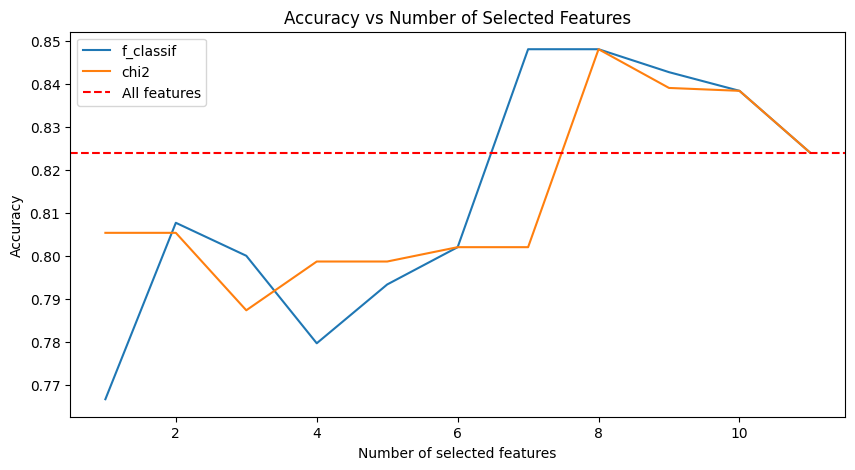

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif, chi2
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/bank_customers_cleaned.csv"
data = pd.read_csv(url)
data = data.drop_duplicates()
X = data.drop(['customer_id', 'churn'], axis=1)
y = data['churn']

# 2. Preprocessing (use MinMaxScaler for non-negative features for chi2)
cat_cols = ['country', 'gender']
num_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ])

X_processed = preprocessor.fit_transform(X)

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

# 4. Train and evaluate model on all features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_all = knn.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred_all)
print(f"Accuracy (all features): {accuracy_all:.2f}")

# 5. Feature selection evaluation function
def evaluate_kbest(k, score_func):
    selector = SelectKBest(score_func=score_func, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    knn.fit(X_train_selected, y_train)
    y_pred = knn.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# 6. Experiment with different numbers of features and score functions
k_values = range(1, X_train.shape[1]+1)
accuracies_f = [evaluate_kbest(k, f_classif) for k in k_values]
accuracies_chi2 = [evaluate_kbest(k, chi2) for k in k_values]

# 7. Visualization
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies_f, label='f_classif')
plt.plot(k_values, accuracies_chi2, label='chi2')
plt.axhline(y=accuracy_all, color='r', linestyle='--', label='All features')
plt.xlabel('Number of selected features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Selected Features')
plt.legend()
plt.show()
